In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
f = lambda x:x-1.4231*np.cos(x)+0.0605061*np.cos(3*x)-0.340759*np.sin(2*x)+0.00515677*np.sin(4*x)
df = lambda x:((np.sin(x)+1.1)**4+.6)/6.06

m = lambda x,w1,w2: f(x@w1)@w2

def L(x,w1,w2,y):
    resids = (y-m(x,w1,w2).ravel())**2
    return resids.sum()


def full_gw1(x,y,w1,w2):
    preds = m(x,w1,w2).ravel()
    resids = y-preds
    return -2*(x.T@(resids.reshape((-1,1))*df(x@w1)))*w2.T/y.size

def get_w2(x,y,w1,w2):
    x_hat = f(x@w1)
    y_hat = x_hat@w2
    resids = y.reshape((-1,1))-y_hat.reshape((-1,1))
    return -x_hat.T@resids/y.size

w1_grad = lambda w1,w2,x,y: np.array([[]])
    

In [113]:
x = np.random.randn(10000,10)
y=(np.sin(x)/np.exp(x)).sum(axis=1)
w1 = np.random.randn(10,880)/np.sqrt(8800)
w2 = np.random.randn(880,1)/np.sqrt(880)

In [114]:
x_eval = np.random.randn(1000,10)
y_eval =(np.sin(x_eval)/np.exp(x_eval)).sum(axis=1)

In [115]:
step_ = .002
grad = np.zeros_like(w1)
grad2 = np.zeros_like(w2)
for i in range(500):
    for k in range(100):
        inputs_ = x[k*100:k*100+100]
        targets = y[k*100:k*100+100]
        grad = full_gw1(inputs_,targets,w1,w2)*.9+grad*.1
        w1-=grad*step_
        print(k,end='\r')
        if np.abs(w1).max()>1000:
            print(L(x_eval,w1,w2,y_eval)/1000)
    grad2 = get_w2(x,y,w1,w2)*.9+grad2*.1
    w2 -= grad2*step_
    print(L(x_eval,w1,w2,y_eval)/1000)

431.6488039432224
1311.901450552324
3731.1436534559675
6419.07054819446
162.16578678689845
28.706619330048277
7.765269093642534
6.02732056766517
5.830492131421448
5.736720539725117
5.6519002858095675
5.583953212080656
5.527992087453631
5.477387266460838
5.431018188484002
5.387977806443493
5.3475057402430055
5.309160198772857
5.272625802702723
5.237662499062048
5.204088966744017
5.171763544094244
5.140572560876638
5.110422964717678
5.081236948134591
5.052948135145856
5.02549886252861
4.998838205339258
4.97292053504361
4.9477044606762774
4.923152046036396
4.899228227613981
4.8759003794078115
4.853137985825302
4.830912394540856
4.8091966287398655
4.787965243510229
4.767194214907359
4.746860852868045
4.726943731021779
4.7074226278031555
4.688278474308581
4.669493305225393
4.651050210014558
4.632933282428298
4.615127567418465
4.597619005505927
4.580394375641022
4.56344123834954
4.546747881377131
4.53030327000478
4.514097003687913
4.49811927977276
4.482360863984423
4.466813066444611
4.451467

2.7554242248069887
2.7546083323470496
2.753796080750737
2.752987484260081
2.752182558341782
2.7513813197558377
2.7505837866210268
2.7497899784768616
2.748999916341583
2.7482136227657548
2.74743112188101
2.7466524394435075
2.7458776028715777
2.745106641277097
2.7443395854900556
2.7435764680758163
2.7428173233445134
2.7420621873520705
2.7413110978922837
2.740564094479438
2.739821218320916
2.739082512279321
2.7383480208235738
2.7376177899685783
2.736891867203015
2.736170301404905
2.735453142744664
2.73474044257543
2.734032253310509
2.7333286282879468
2.7326296216222925
2.7319352880437573
2.731245682725117
2.7305608610968495
2.729880878651116
2.729205790735408
2.728535652336787
2.7278705178578257
2.727210440885533
2.7265554739546625
2.7259056683069813
2.7252610736481757
2.7246217379042164
2.723987706979078
2.723359024515803
2.7227357316629264
2.7221178668483272
2.721505465562549
2.720898560153595
2.7202971796351405
2.71970134951003
2.7191110916107384
2.7185264239583806
2.7179473606416407


In [116]:
y_hat = m(x_eval,w1,w2)

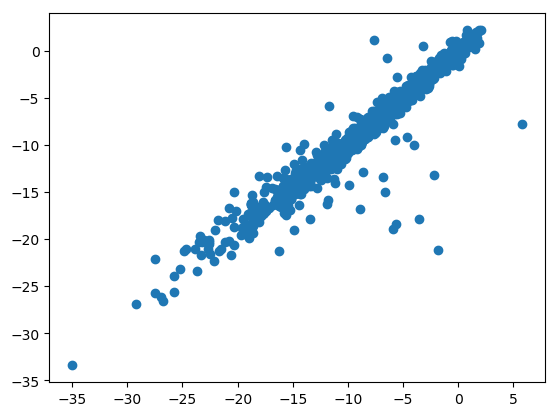

In [117]:
plt.scatter(y_eval,y_hat)
plt.show()